In [1]:
from torchvision.models import vgg19

/opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/lib/python3.9/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <FB2FD416-6C4D-3621-B677-61F07C02A3C5> /opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/lib/python3.9/site-packages/torchvision/image.so
  Reason: tried: '/opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/lib/python3.9/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/lib/python3.9/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/lib/python3.9/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on usin

In [2]:
vgg19_model = vgg19(pretrained=True)

/opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
vgg19_model.features[:10]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [4]:
conv = {
    'conv1_1' : 0, # style
    'conv2_1' : 5, # style
    'conv3_1' : 10, # style
    'conv4_1' : 19, # style
    'conv5_1' : 28, # style
    'conv4_2' : 21, # content
}

In [5]:
import torch
x = torch.ones(1, 3, 256, 256)
y = vgg19_model.features[:conv['conv5_1']+1](x) # need to use output, so have to make sequence by using colon(':')
y.shape

torch.Size([1, 512, 16, 16])

In [6]:
from models import StyleTransfer

In [7]:
my_model = StyleTransfer()

In [8]:
import torch
x = torch.ones(1, 3, 256, 256)
y = my_model(x, 'style')
y[0].shape

torch.Size([1, 64, 256, 256])

In [9]:
from loss import StyleLoss

In [10]:
style_loss = StyleLoss()
import torch
feature_map = torch.ones(1, 3, 256, 256)
G = style_loss.gram_matrix(feature_map)

In [11]:
256*256

65536

In [12]:
G*3*256*256

tensor([[[65536., 65536., 65536.],
         [65536., 65536., 65536.],
         [65536., 65536., 65536.]]])

In [13]:
x = torch.ones(1, 3, 256, 256)
y = torch.zeros(1, 3, 256, 256)

In [ ]:
style_loss(x, y)

tensor(0.1111)

In [1]:
import torch
from PIL import Image
from train import pre_processing, post_processing

/opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/lib/python3.9/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <FB2FD416-6C4D-3621-B677-61F07C02A3C5> /opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/lib/python3.9/site-packages/torchvision/image.so
  Reason: tried: '/opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/lib/python3.9/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/lib/python3.9/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/lib/python3.9/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/DL-envs/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on usin

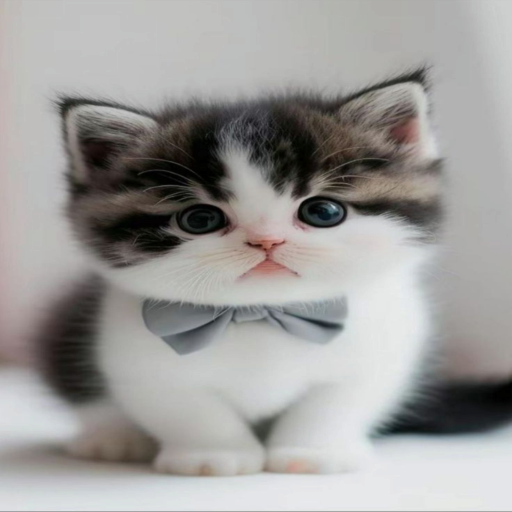

In [3]:
image = Image.open('./img/content.jpg')
image
# image -> tensor
image_tensor = pre_processing(image)
image_tensor.shape

# tensor -> image
image_pil = post_processing(image_tensor)
image_pil